In [2]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
import csv
import matplotlib.pyplot as plt

import seaborn as sns


In [3]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]




In [4]:

one_hot = TransactionEncoder()
transf=one_hot.fit(dataset).transform(dataset)    
frame=pd.DataFrame(transf, columns=one_hot.columns_) 

frame.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [5]:
frame.columns


Index(['Dress', 'Earrings', 'Hat', 'Heels', 'Necklace', 'Pants', 'Sandals',
       'Scarf', 'Shirt', 'Skirt', 'Sneakers', 'Sunglasses'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

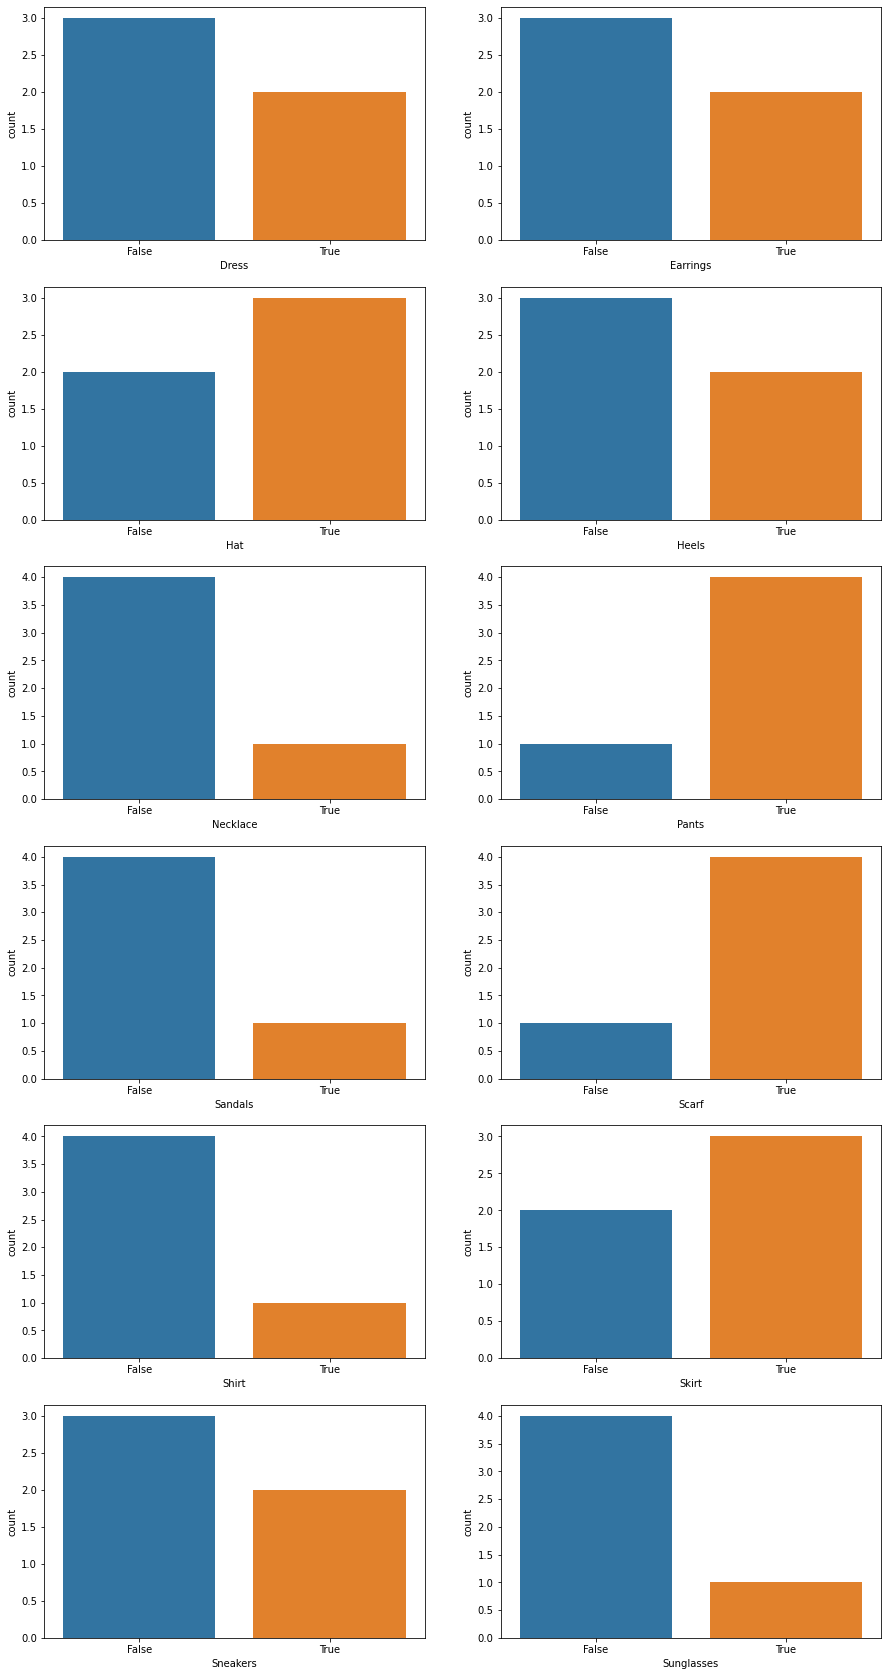

In [6]:
varr=['Dress', 'Earrings', 'Hat', 'Heels', 'Necklace', 'Pants', 'Sandals',
       'Scarf', 'Shirt', 'Skirt', 'Sneakers', 'Sunglasses']

list(enumerate(varr))
plt.figure(figsize=(15,30))
for i in enumerate(varr):
    
    plt.subplot(6,2,i[0]+1)
    sns.countplot(i[1], data=frame)

In [7]:
frequent_itemsets=apriori(frame, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [8]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [9]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [10]:

with open('Market_Basket_Optimisation.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

FileNotFoundError: [Errno 2] No such file or directory: 'Market_Basket_Optimisation.csv'

In [11]:
transf1=one_hot.fit(data).transform(data)    
data1=pd.DataFrame(transf1,columns=one_hot.columns_) 
data1.head()

NameError: name 'data' is not defined

In [317]:
frequent_item=apriori(data1, min_support=0.1, use_colnames=True)
frequent_item

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [318]:
association_rules(frequent_item,metric="lift",min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [320]:
association_rules(frequent_item,metric="confidence",min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
